In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from result import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('error')

In [5]:
def read_all(theme, theme0, directory, Result = Result, standard = []):
    nTheme = len(theme)
    r = np.empty((nTheme,), dtype=object)
    dt = np.empty((nTheme,), dtype=float)
    t = np.empty((nTheme,), dtype=object)
    for i in range(nTheme):
        r[i] = Result(theme[i], directory)
        #r[i].read_voltage_trace()
        #r[i].read_spikeTrain()
        #r[i].read_conductance_trace()   
        dt[i] = r[i].dt
        t[i] = dt[i]*np.arange(r[i].nstep+1)

    r0 = Result(theme0, directory)
    t0 = r0.dt*np.arange(r0.nstep+1)
    if len(standard) == 0:
        standard = r0.get_accVolt()
    r0.get_raster()
    #r0.read_voltage_trace()
    #r0.read_conductance_trace()
    acv = np.empty((nTheme, r0.n))
    #vm = np.mean(r0.v,0)
    print('calculating acc. volt.')
    for i in range(nTheme):
        #print(i)
        accVolt = r[i].get_accVolt()
        jt = (standard.shape[1]-1)//r[i].nstep
        tpick = np.arange(0, (r[i].nstep+1)*jt, jt, dtype=int)
        #print(standard.shape, accVolt.shape, tpick.size, tpick[-1])
        acv[i,:] = np.mean(np.abs((accVolt - standard[:,tpick])/standard[:,tpick]),1)
    return r0, r, acv, dt, t, standard

In [26]:
directory = '../proftest/x64/Release'
#directory = '../impl/x64/bench'
theme = ['ws1', 'ws2', 'ws3', 'ws4','ws5','ws6','ws7','ws8','ws9','ws10','ws11','ws12','ws13','ws14']
theme0 = 'ws0'
#theme = ['bs1', 'bs2', 'bs3', 'bs4','bs5','bs6','bs7','bs8','bs9','bs10','bs11','bs12','bs13','bs14','bs15']
#theme0 = 'bs0'
#p0, p, pcv, _, _ = read_all(theme, theme0, directory, Result)
c0, c, acc, dt, t, _ = read_all(theme, theme0, directory, cResult)

32768 0.001953125 80.0
16384 0.00390625 80.0
8192 0.0078125 80.0
4096 0.015625 80.0
2048 0.03125 80.0
1024 0.0625 80.0
512 0.125 80.0
256 0.25 80.0
128 0.5 80.0
64 1.0 80.0
32 2.0 80.0
16 4.0 80.0
8 8.0 80.0
4 16.0 80.0
65536 0.0009765625 80.0
calculating acc. volt.


In [12]:
directory = '../impl/x64/impl'
theme = ['ws1', 'ws2', 'ws3', 'ws4','ws5','ws6','ws7','ws8','ws9','ws10','ws11','ws12','ws13','ws14']
theme0 = 'ws0'
#theme = ['ns1', 'ns2', 'ns3', 'ns4','ns5','ns6','ns7','ns8','ns9','ns10','ns11','ns12','ns13','ns14','ns15']
#theme0 = 'ns0'
#theme = ['bs1', 'bs2', 'bs3', 'bs4','bs5','bs6','bs7','bs8','bs9','bs10','bs11','bs12','bs13','bs14','bs15']
#theme0 = 'bs0'
#s0, s, acs, dt, t, impl_standard = read_all(theme, theme0, directory, sResult)
s0, s, acs, dt, t, standard = read_all(theme, theme0, directory, sResult)

32768 0.001953125 100.0
16384 0.00390625 100.0
8192 0.0078125 100.0
4096 0.015625 100.0
2048 0.03125 100.0
1024 0.0625 100.0
512 0.125 100.0
256 0.25 100.0
128 0.5 100.0
64 1.0 100.0
32 2.0 100.0
16 4.0 100.0
8 8.0 100.0
4 16.0 100.0
65536 0.0009765625 100.0
calculating acc. volt.


In [13]:
#directory = '../impl/x64/rangan'
directory = '../impl/x64/impl'
theme = ['ws1', 'ws2', 'ws3', 'ws4','ws5','ws6','ws7','ws8','ws9','ws10','ws11','ws12','ws13','ws14']
theme0 = 'ws0'
w0, w, acw, _, _, _ = read_all(theme, theme0, directory, Result)

32768 0.001953125 100.0
16384 0.00390625 100.0
8192 0.0078125 100.0
4096 0.015625 100.0
2048 0.03125 100.0
1024 0.0625 100.0
512 0.125 100.0
256 0.25 100.0
128 0.5 100.0
64 1.0 100.0
32 2.0 100.0
16 4.0 100.0
8 8.0 100.0
4 16.0 100.0
65536 0.0009765625 100.0
calculating acc. volt.


In [ ]:
theme = ['ws1', 'ws2', 'ws3', 'ws4','ws5','ws6','ws7','ws8','ws9','ws10','ws11','ws12','ws13','ws14']
theme0 = 'ws0'
#theme = ['bs1', 'bs2', 'bs3', 'bs4','bs5','bs6','bs7','bs8','bs9','bs10','bs11','bs12','bs13','bs14','bs15']
#theme0 = 'bs0'
#theme = ['ns1', 'ns2', 'ns3', 'ns4','ns5','ns6','ns7','ns8','ns9','ns10','ns11','ns12','ns13','ns14','ns15']
#theme0 = 'ns0'
#directory = '../benchmark_without_ssc/x64/Release'
directory = '../impl/x64/bench'
b0, b, acb, _, _, _= read_all(theme, theme0, directory, sResult, standard)
#w0, w, acw, _, _, _ = read_all(theme, theme0, directory, sResult, impl_ssc_standard)

In [7]:
directory = '../proftest/x64/Release'
theme = ['ws1', 'ws2', 'ws3', 'ws4','ws5','ws6','ws7','ws8','ws9','ws10','ws11','ws12','ws13','ws14']
theme0 = 'ws0'
#theme = ['bs1', 'bs2', 'bs3', 'bs4','bs5','bs6','bs7','bs8','bs9','bs10','bs11','bs12','bs13','bs14','bs15']
#theme0 = 'bs0'
#theme = ['ns1', 'ns2', 'ns3', 'ns4','ns5','ns6','ns7','ns8','ns9','ns10','ns11','ns12','ns13','ns14','ns15']
#theme0 = 'ns0'
r0, r, acr, _, _, standard = read_all(theme, theme0, directory, rResult)
#r0, r, acr, _, _, standard = read_all(theme, theme0, directory, rResult, standard)

32768 0.001953125 100.0
16384 0.00390625 100.0
8192 0.0078125 100.0
4096 0.015625 100.0
2048 0.03125 100.0
1024 0.0625 100.0
512 0.125 100.0
256 0.25 100.0
128 0.5 100.0
64 1.0 100.0
32 2.0 100.0
16 4.0 100.0
8 8.0 100.0
4 16.0 100.0
65536 0.0009765625 100.0
calculating acc. volt.


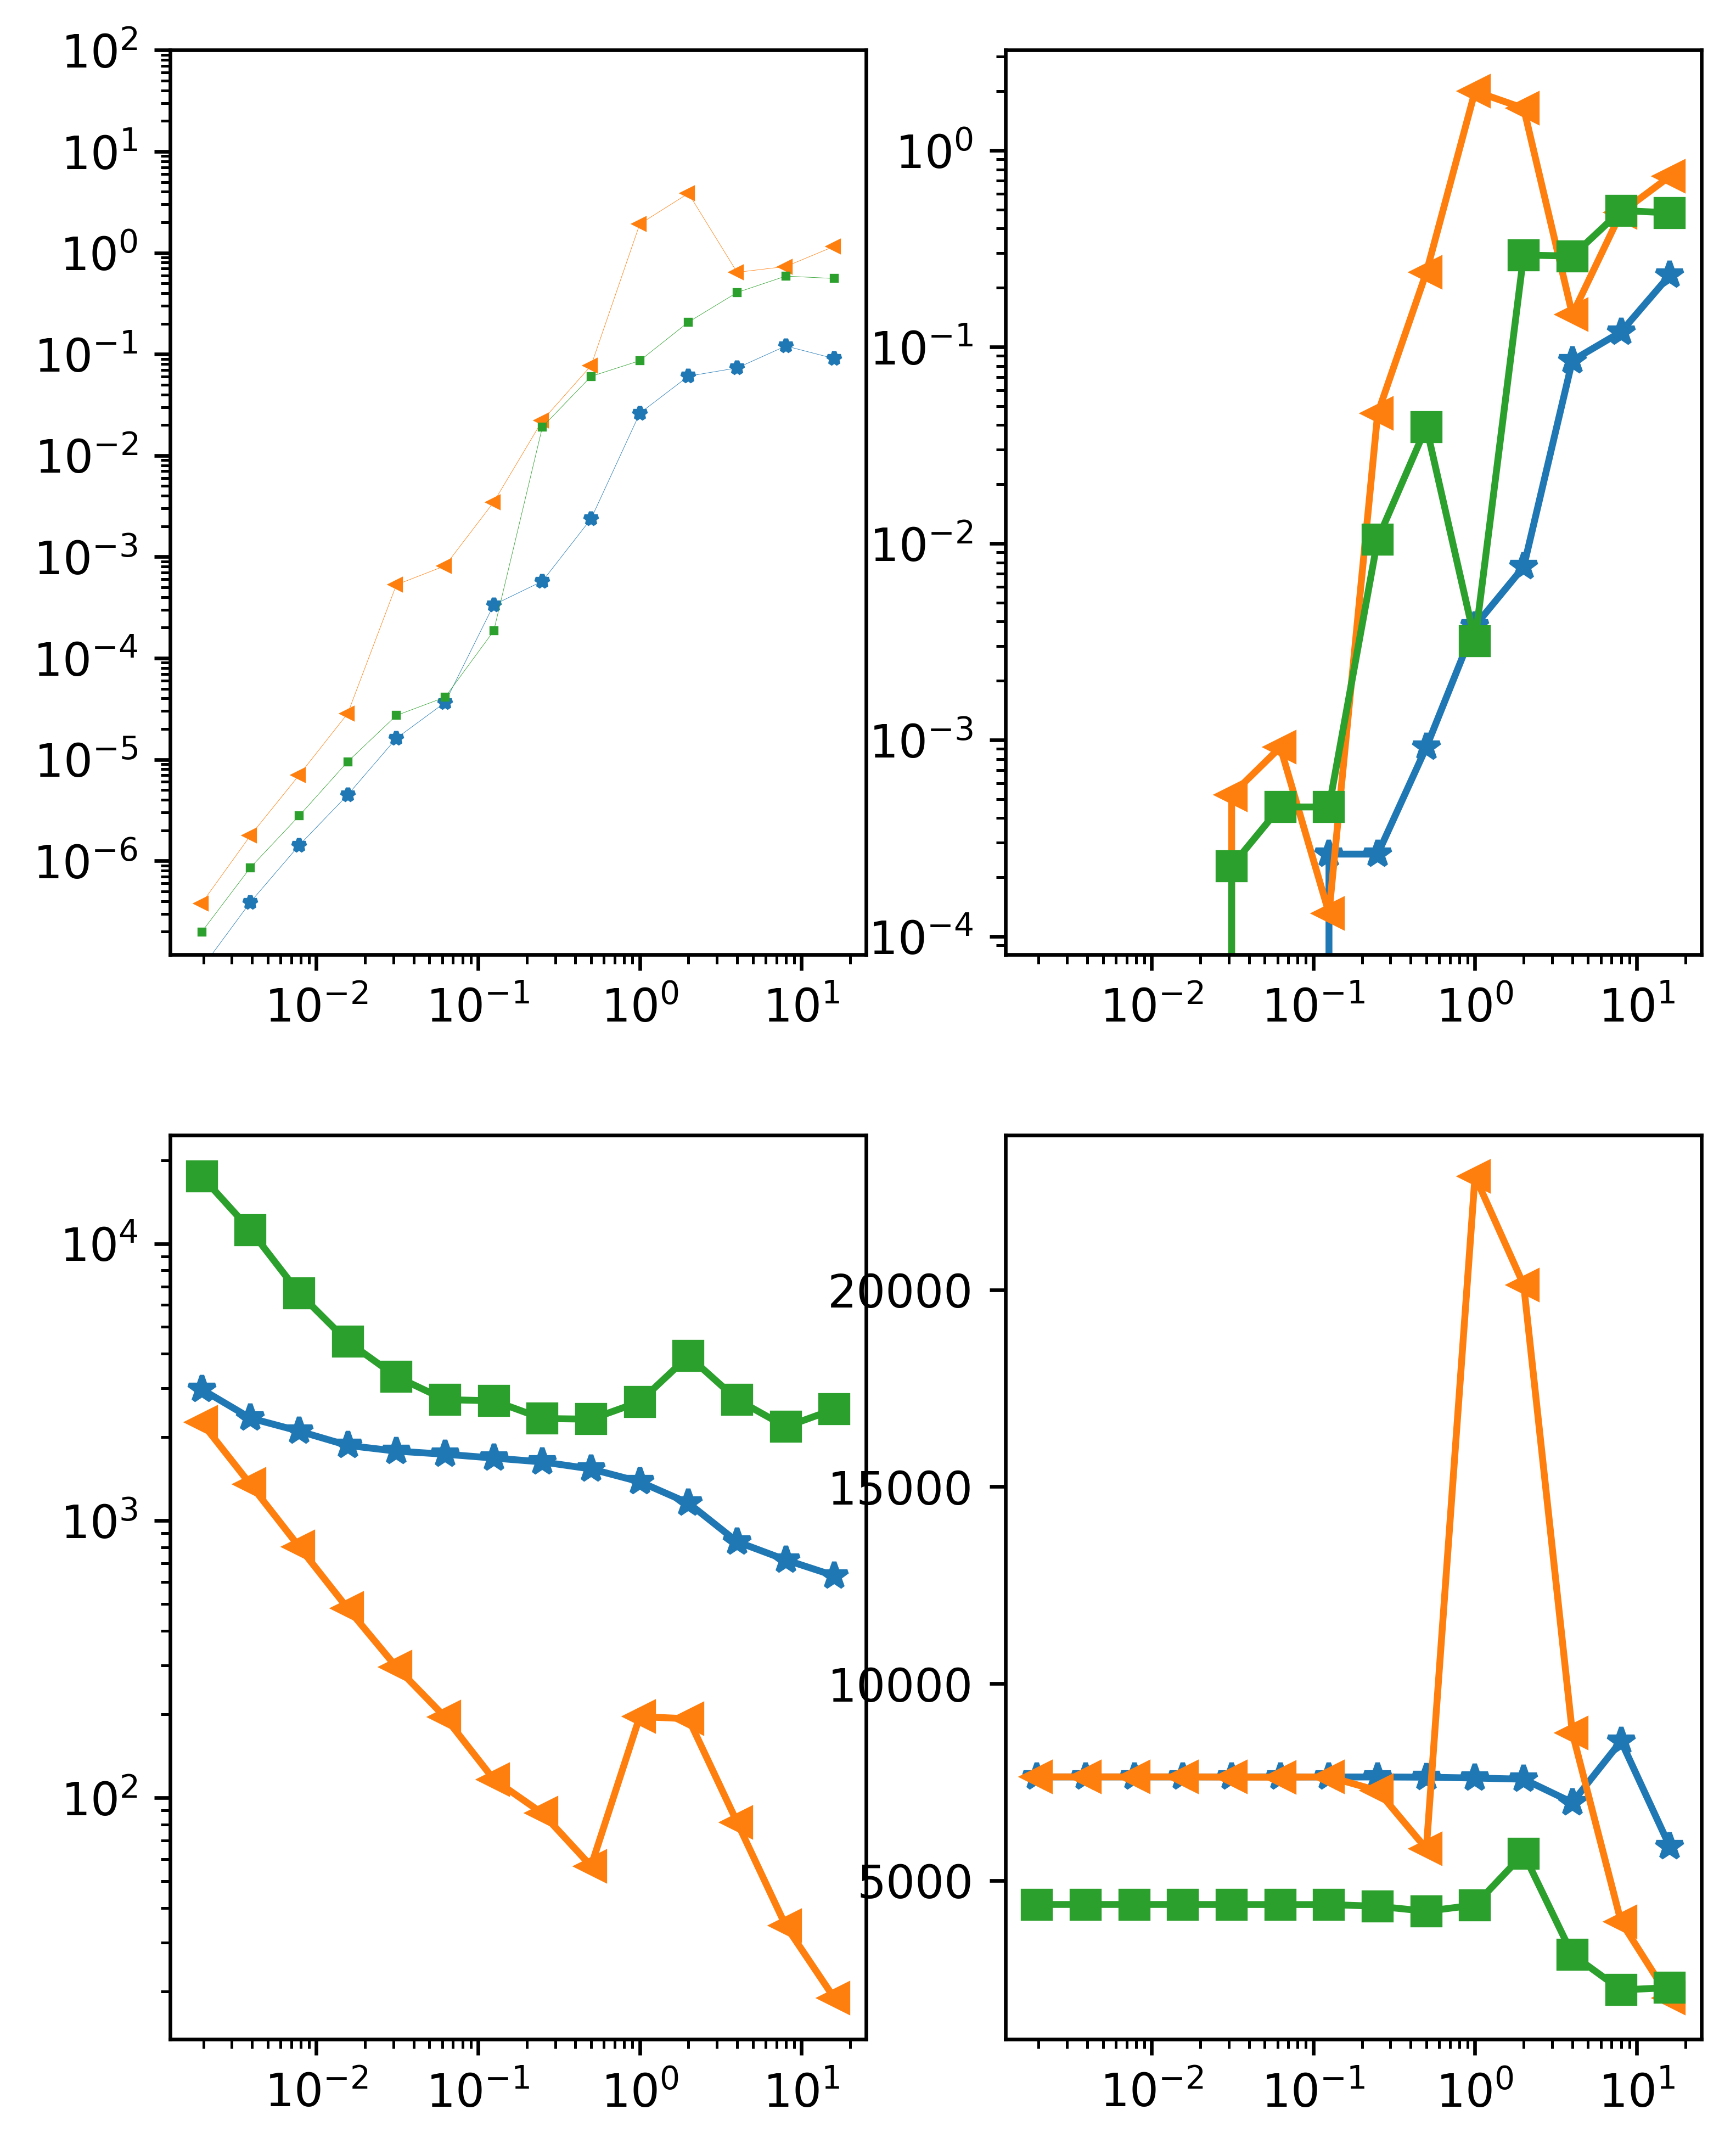

In [14]:
nTheme = len(theme)
i = 15
l = np.empty((4,), dtype=object)
version = ('gpu_impl')
fig = plt.figure('acc. v', figsize = (6,8), dpi = 600)
ax = fig.add_subplot(221)
if 's' in locals():
    ax.plot(dt[:i], np.mean(acs[:i,:],1),'-*', lw = 0.1, ms = 3)
if 'w' in locals():
    ax.plot(dt[:i], np.mean(acw[:i,:],1),'-<', lw = 0.1, ms = 2)
if 'b' in locals():
    ax.plot(dt[:i], np.mean(acb[:i,:],1),'->', lw = 0.1, ms = 1)
if 'c' in locals():
    ax.plot(dt[:i], np.mean(acc[:i,:],1),'-o', lw = 0.1, ms = 1)
if 'r' in locals():
    ax.plot(dt[:i], np.mean(acr[:i,:],1),'-s', lw = 0.1, ms = 1)

ax.set_yscale('log')
ax.set_ylim(np.finfo(np.float32).eps,100)
ax.set_xscale('log')
ax = fig.add_subplot(222)

if 's0' in locals():
    s0.get_nSpikePerDt()
    ss = np.sum(s0.nSpikePerDt)
if 'w0' in locals():
    w0.get_nSpikePerDt()
    ws = np.sum(w0.nSpikePerDt)
if 'b0' in locals():
    b0.get_nSpikePerDt()
    bs = np.sum(b0.nSpikePerDt)
if 'c0' in locals():
    c0.get_nSpikePerDt()
    cs = np.sum(c0.nSpikePerDt)
if 'r0' in locals():
    r0.get_nSpikePerDt()
    rs = np.sum(r0.nSpikePerDt)

sss = np.empty(nTheme)
wss = np.empty(nTheme)
bss = np.empty(nTheme)
css = np.empty(nTheme)
rss = np.empty(nTheme)
for j in range(nTheme):
    if 's' in locals():
        sss[j] = np.sum(s[j].nSpikePerDt)
    if 'w' in locals():
        wss[j] = np.sum(w[j].nSpikePerDt)
    if 'b' in locals():
        bss[j] = np.sum(b[j].nSpikePerDt)
    if 'c' in locals():
        css[j] = np.sum(c[j].nSpikePerDt)
    if 'r' in locals():
        rss[j] = np.sum(r[j].nSpikePerDt)

if 'standard_fr' in locals():
    del(standard_fr)
# standard_fr = 
if 'standard_fr' in locals():
    if 's' in locals():
        ax.plot(dt[:i], np.abs(sss[:i]-standard_fr)/standard_fr,'-*')
    if 'w' in locals():
        ax.plot(dt[:i], np.abs(wss[:i]-standard_fr)/standard_fr,'-<')
    if 'b' in locals():
        ax.plot(dt[:i], np.abs(bss[:i]-standard_fr)/standard_fr,'->')
else:
    if 's' in locals():
        ax.plot(dt[:i], np.abs(sss[:i]-ss)/ss,'-*')
    if 'w' in locals():
        ax.plot(dt[:i], np.abs(wss[:i]-ws)/ws,'-<')
    if 'b' in locals():
        ax.plot(dt[:i], np.abs(bss[:i]-bs)/bs,'->')
if 'c' in locals():
    ax.plot(dt[:i], np.abs(css[:i]-cs)/cs,'-o')
if 'r' in locals():
    ax.plot(dt[:i], np.abs(rss[:i]-rs)/rs,'-s')

ax.set_xscale('log')
ax.set_yscale('log')
ax = fig.add_subplot(223)

st = np.empty(nTheme)
wt = np.empty(nTheme)
bt = np.empty(nTheme)
ct = np.empty(nTheme)
rt = np.empty(nTheme)

for j in range(nTheme):
    if 's' in locals():
        st[j] = np.sum(s[j].timer)
    if 'w' in locals():
        wt[j] = np.sum(w[j].timer)
    if 'b' in locals():
        bt[j] = np.sum(b[j].timer)
    if 'c' in locals():
        ct[j] = np.sum(c[j].timer)
    if 'r' in locals():
        rt[j] = np.sum(r[j].timer)
    
if 's' in locals():
    ax.plot(dt[:i], st[:i],'-*')
if 'w' in locals():
    ax.plot(dt[:i], wt[:i],'-<')
if 'b' in locals():
    ax.plot(dt[:i], bt[:i],'->')
if 'c' in locals():
    ax.plot(dt[:i], ct[:i],'-o')
if 'r' in locals():
    ax.plot(dt[:i], rt[:i],'-s')

ax.set_xscale('log')
ax.set_yscale('log')

ax = fig.add_subplot(224)
if 's' in locals():
    ax.plot(dt[:i], sss[:i],'-*')
if 'w' in locals():
    ax.plot(dt[:i], wss[:i],'-<')
if 'b' in locals():
    ax.plot(dt[:i], bss[:i],'->')
if 'c' in locals():
    ax.plot(dt[:i], css[:i],'-o')
if 'r' in locals():
    ax.plot(dt[:i], rss[:i],'-s')
ax.set_xscale('log')

In [15]:
fig.savefig("10xgL-cortical-poisson.png", dpi=300)

In [21]:
512/8192

0.0625

In [ ]:
s0.get_conductance_trace(), c0.get_conductance_trace()
np.mean(s0.gI[:,0,:]), np.mean(c0.gI[:,0,:])

In [ ]:
spikes = np.hstack([x for x in (w0.raster[i] for i in range(w0.n))])

In [ ]:
sorted_spikes = np.sort(spikes)

In [ ]:
isi = sorted_spikes[1:] - sorted_spikes[:-1]
smallest_dt = np.min(isi)
print(1/smallest_dt,np.power(2,17))

In [ ]:
acs.shape[1]

In [ ]:
j = 6
np.sum(s[j].nSpikePerDt), np.sum(w[j].nSpikePerDt), np.sum(b[j].nSpikePerDt)

In [ ]:
np.isnan(s0.v[:,1])
print(s0.v[:30,1])

In [ ]:
x1 = 0
x2 = 51.2

In [ ]:
raster_plot(cr, cr0, x1, x2)

In [ ]:
raster_plot.fignum = 0
raster_plot(c, c0, x1, x2)

In [ ]:
raster_plot.fignum = 0
raster_plot(r, r0, x1, x2)

In [ ]:
raster_plot.fignum = 0
raster_plot(bw, bw0, x1, x2)

In [ ]:
raster_plot(w, w0, x1, x2)

In [ ]:
raster_plot(p, p0, x1, x2)

In [ ]:
fig = plt.figure('raster0', dpi = 600, figsize = (4,20))
ax = fig.add_subplot(111)
j = 4
for i in range(r0.n):
    #ax.plot(cr0.raster[i], np.zeros(cr0.raster[i].size)+i, 'sg', ms = 4)
    #ax.plot(p0.raster[i], np.zeros(p0.raster[i].size)+i, '*y', ms = 3)
    #ax.plot(c0.raster[i], np.zeros(c0.raster[i].size)+i, 'om', ms = 2)
    #ax.plot(w0.raster[i], np.zeros(w0.raster[i].size)+i, '>b', ms = 1)

    #ax.plot(c0.raster[i], np.zeros(c0.raster[i].size)+i, 'sr', ms = 3)
    #ax.plot(c[j].raster[i], np.zeros(c[j].raster[i].size)+i, '>g', ms = 2)
    #ax.plot(r[j].raster[i], np.zeros(r[j].raster[i].size)+i, 'ob', ms = 1)
    
    ax.plot(s0.raster[i], np.zeros(s0.raster[i].size)+i, 'sr', ms = 3)
    ax.plot(s[j].raster[i], np.zeros(s[j].raster[i].size)+i, 'ok', ms = 2)
    ax.plot(w[j].raster[i], np.zeros(w[j].raster[i].size)+i, '>g', ms = 2)
    ax.plot(b[j].raster[i], np.zeros(b[j].raster[i].size)+i, '<b', ms = 1)

In [20]:
from result import *

In [21]:
benchmark = s[7]
fs = np.zeros(benchmark.n)
for i in range(benchmark.n):
    if benchmark.raster[i].size>0:
        fs[i] = benchmark.raster[i][0]
    else:
        fs[i] = 64
irand = np.argsort(fs)
print(irand)

[ 14 705 625 ..., 852 850 907]


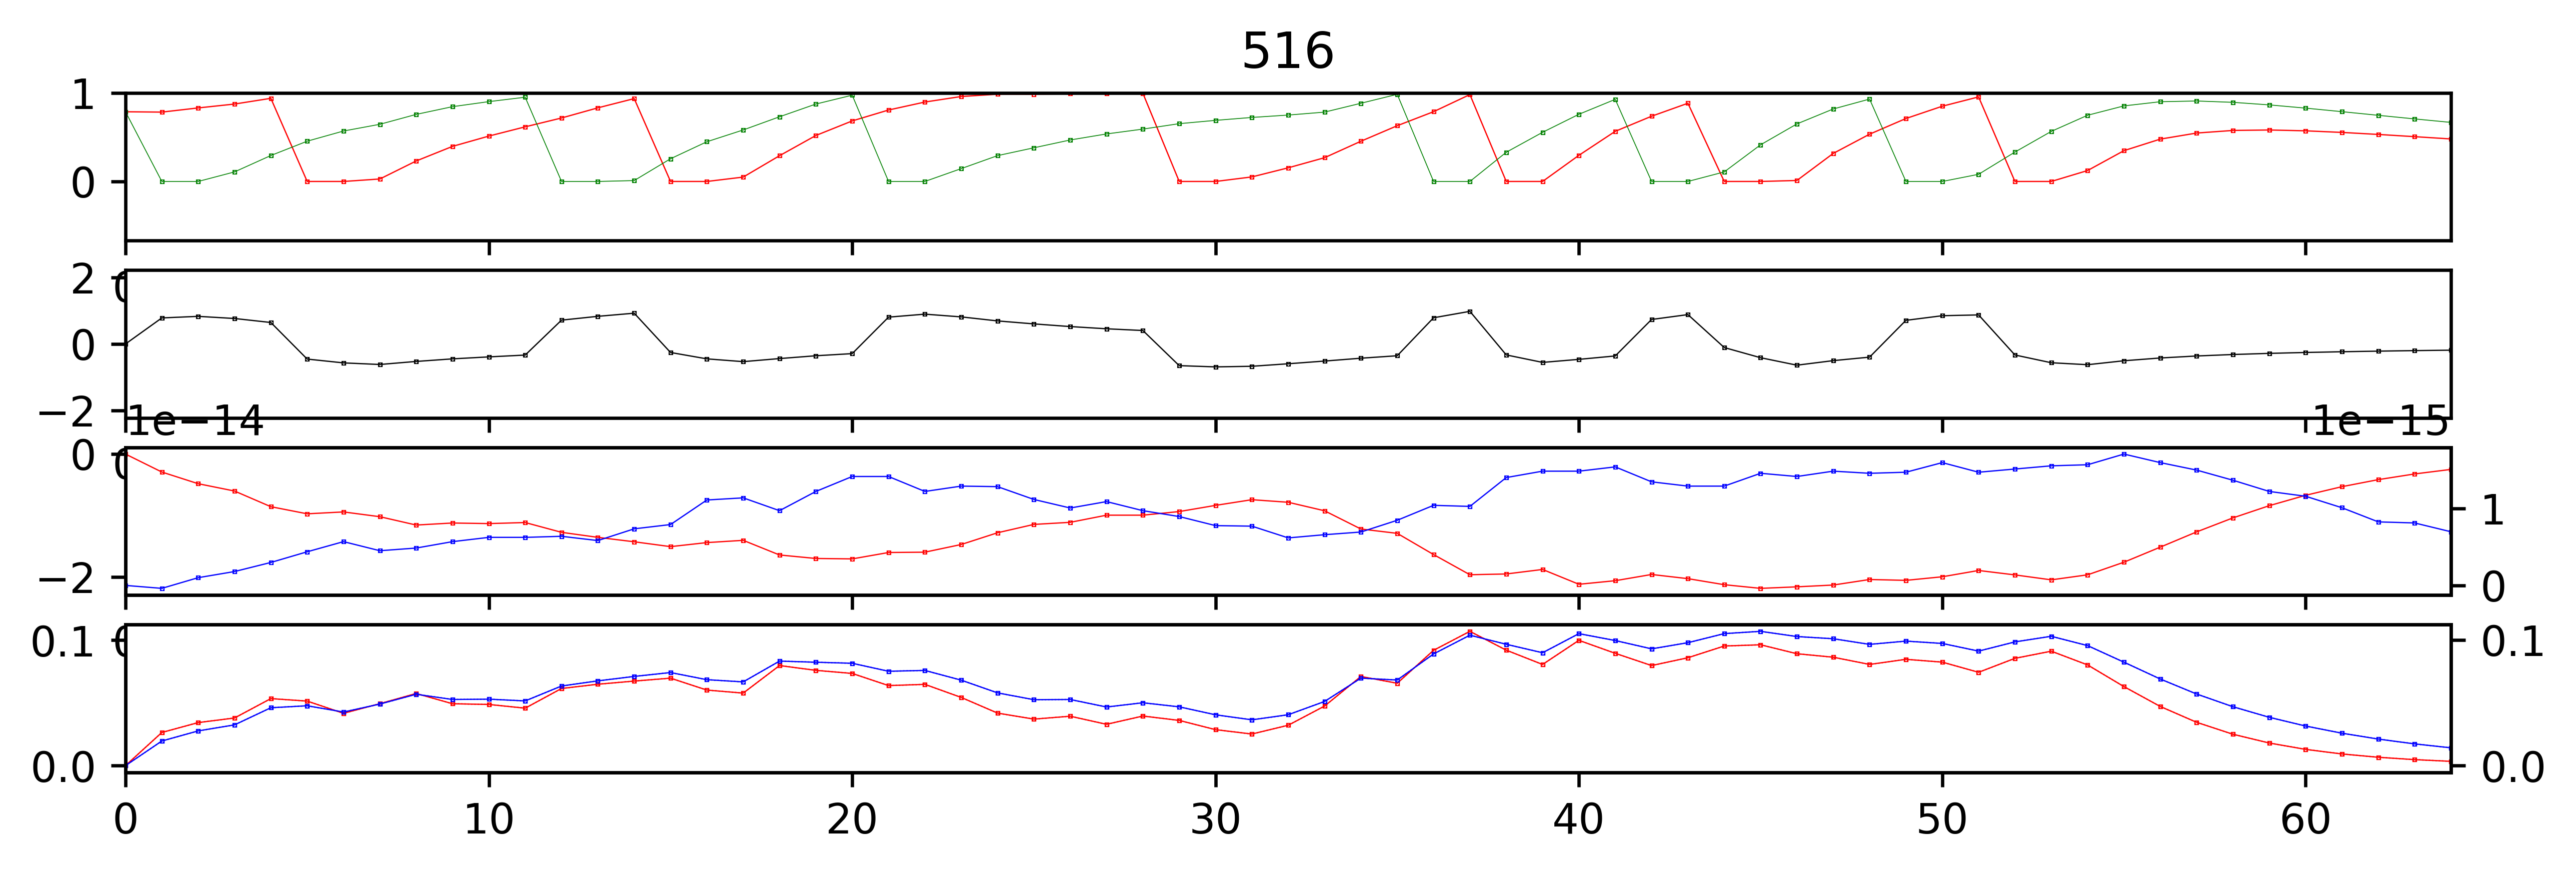

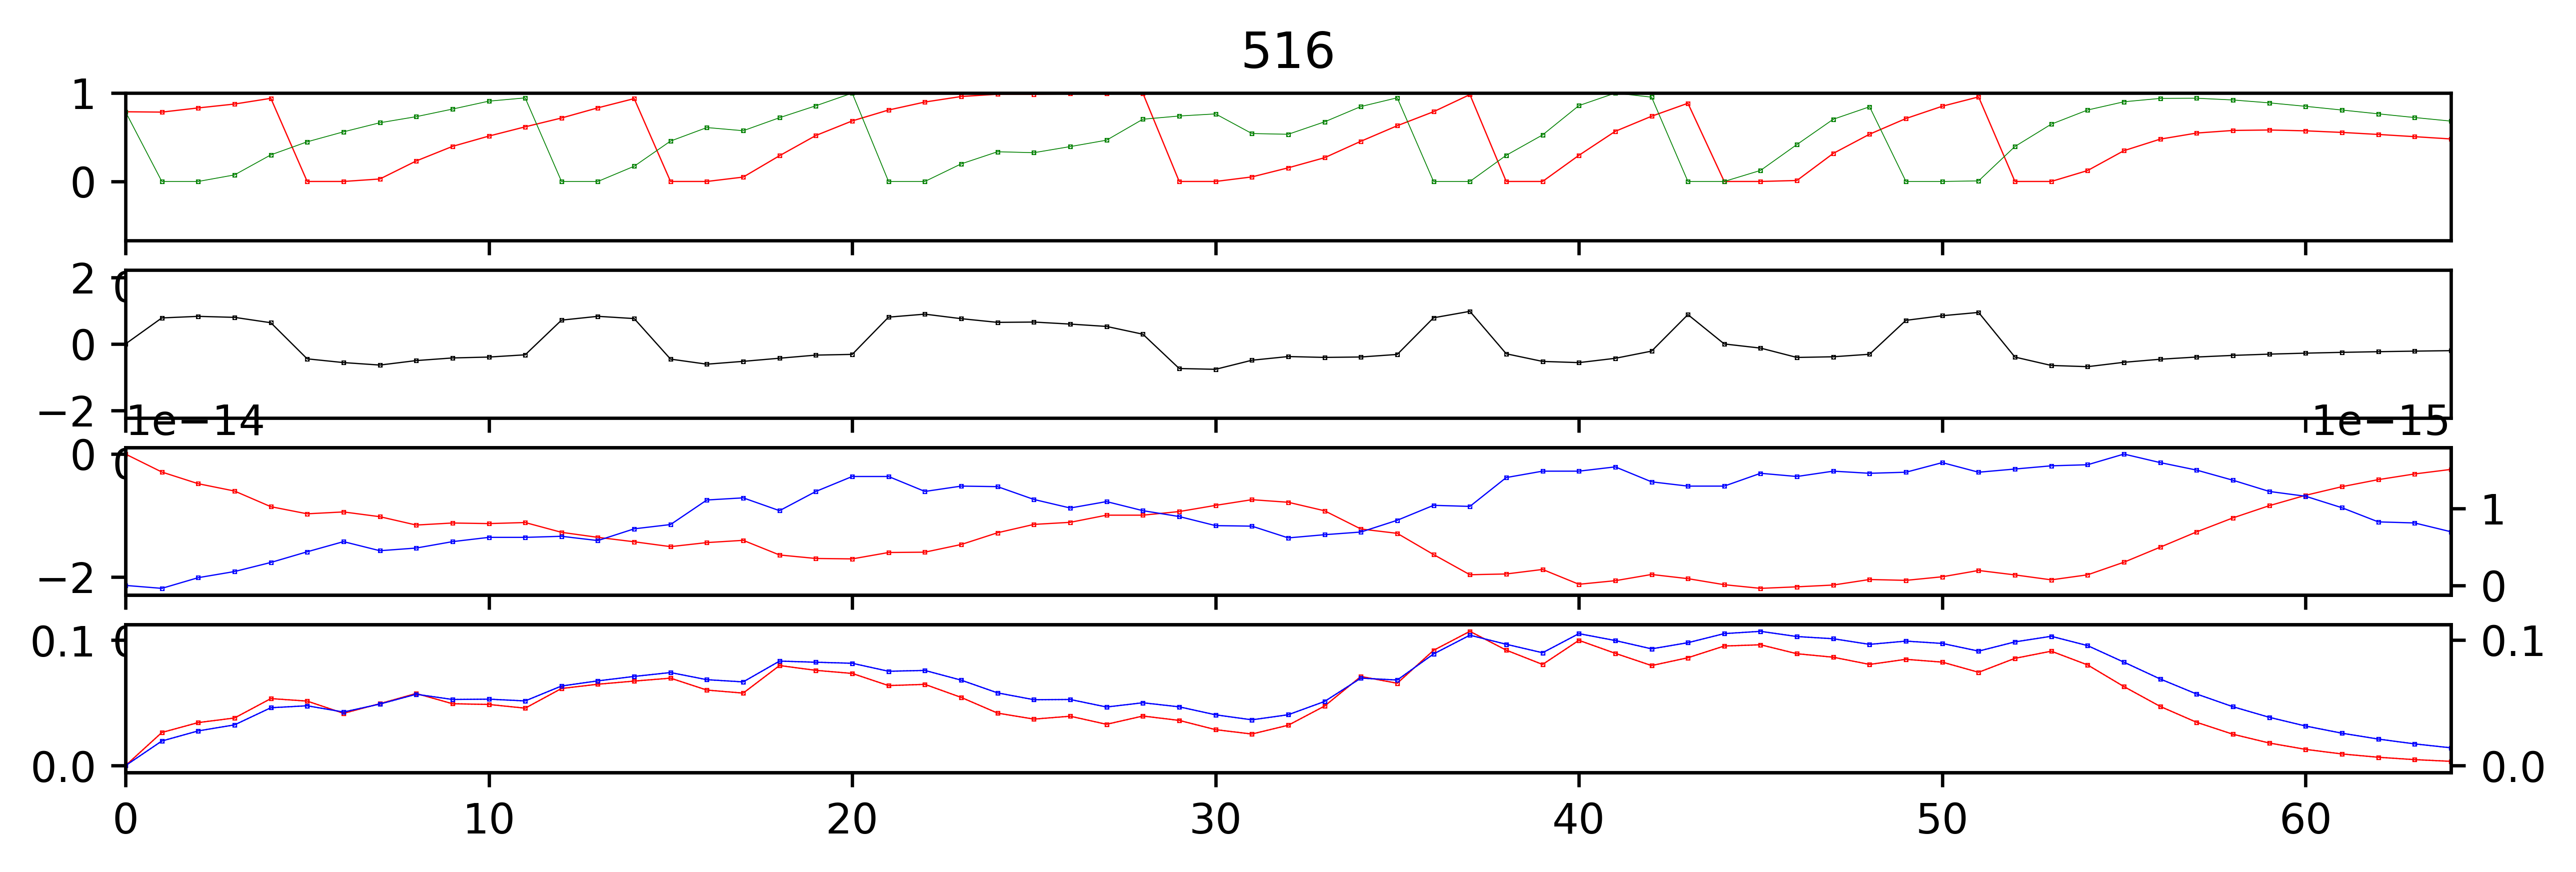

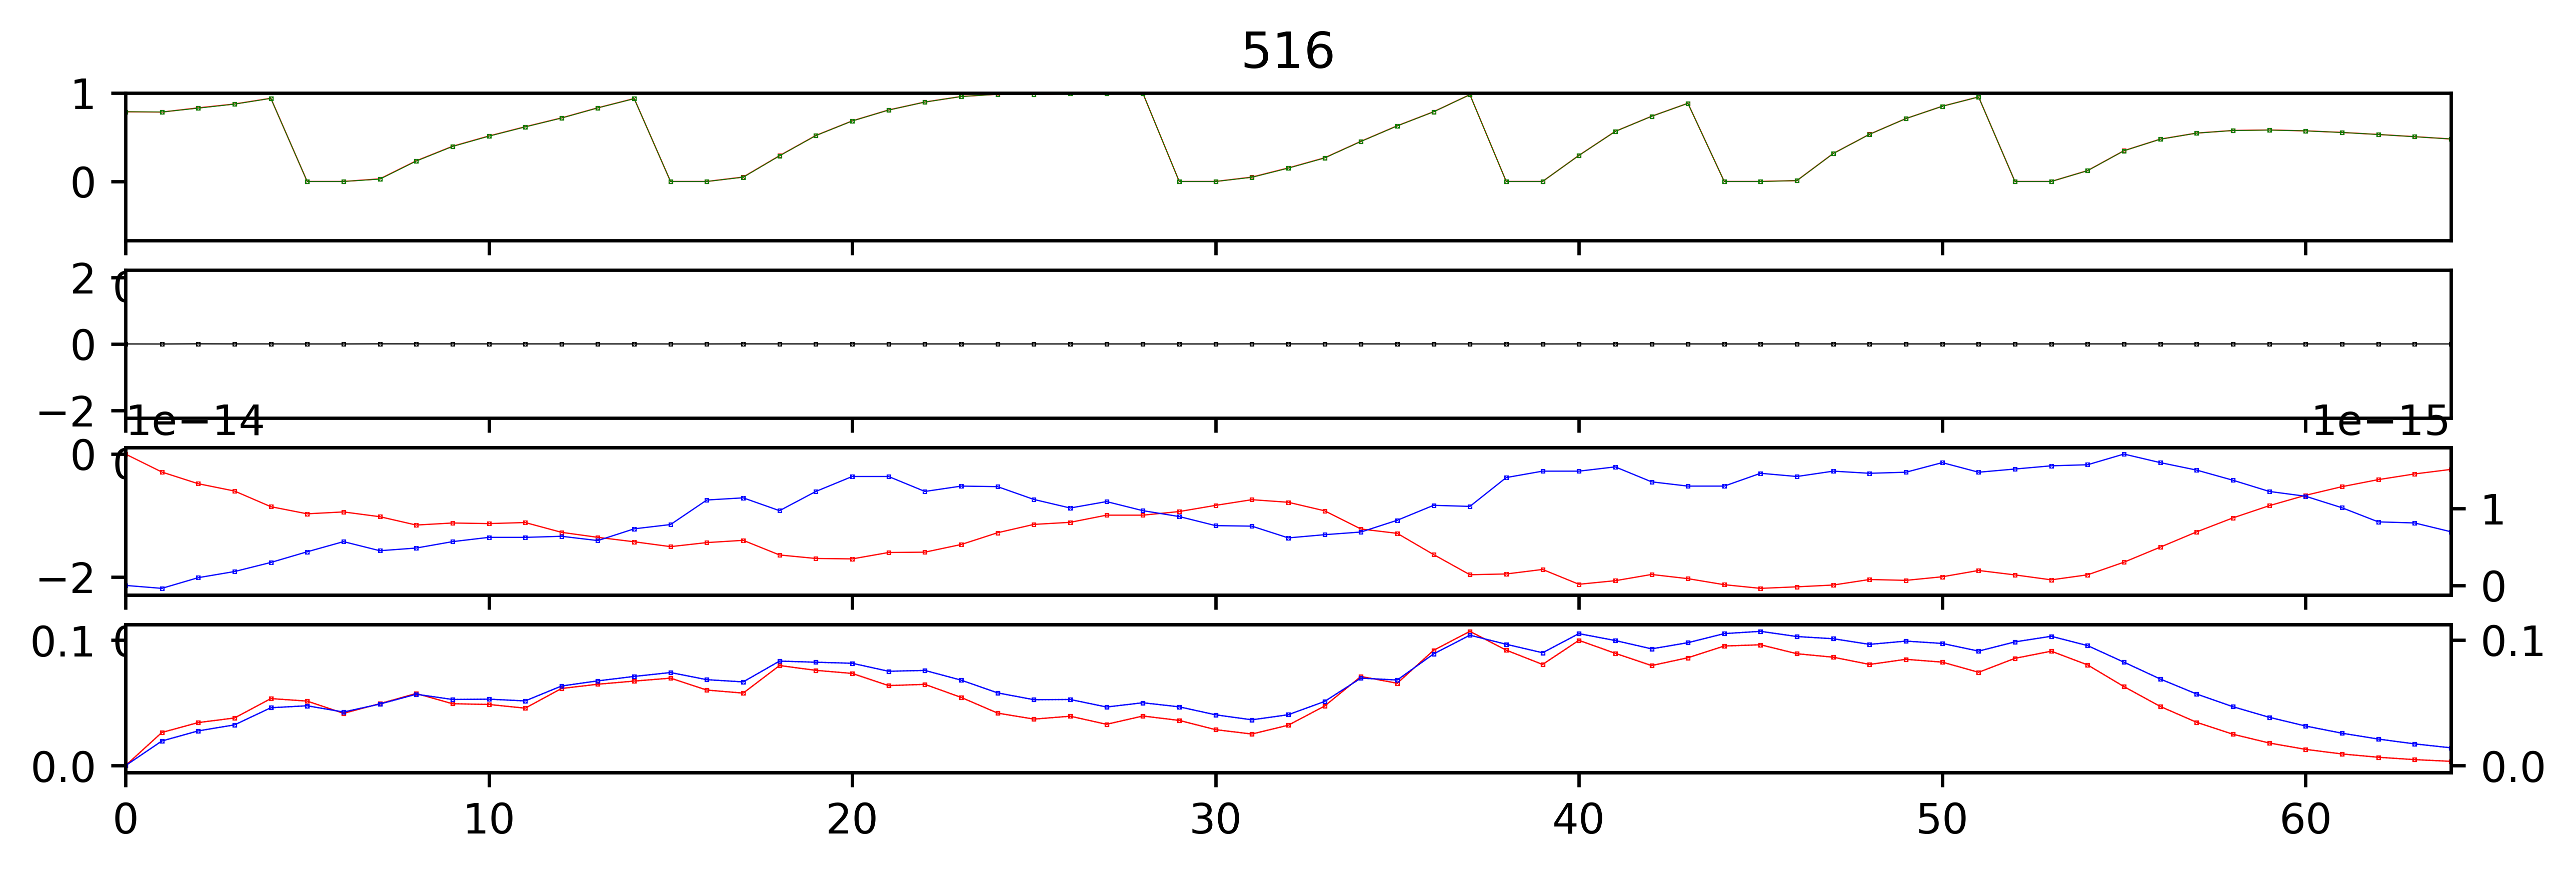

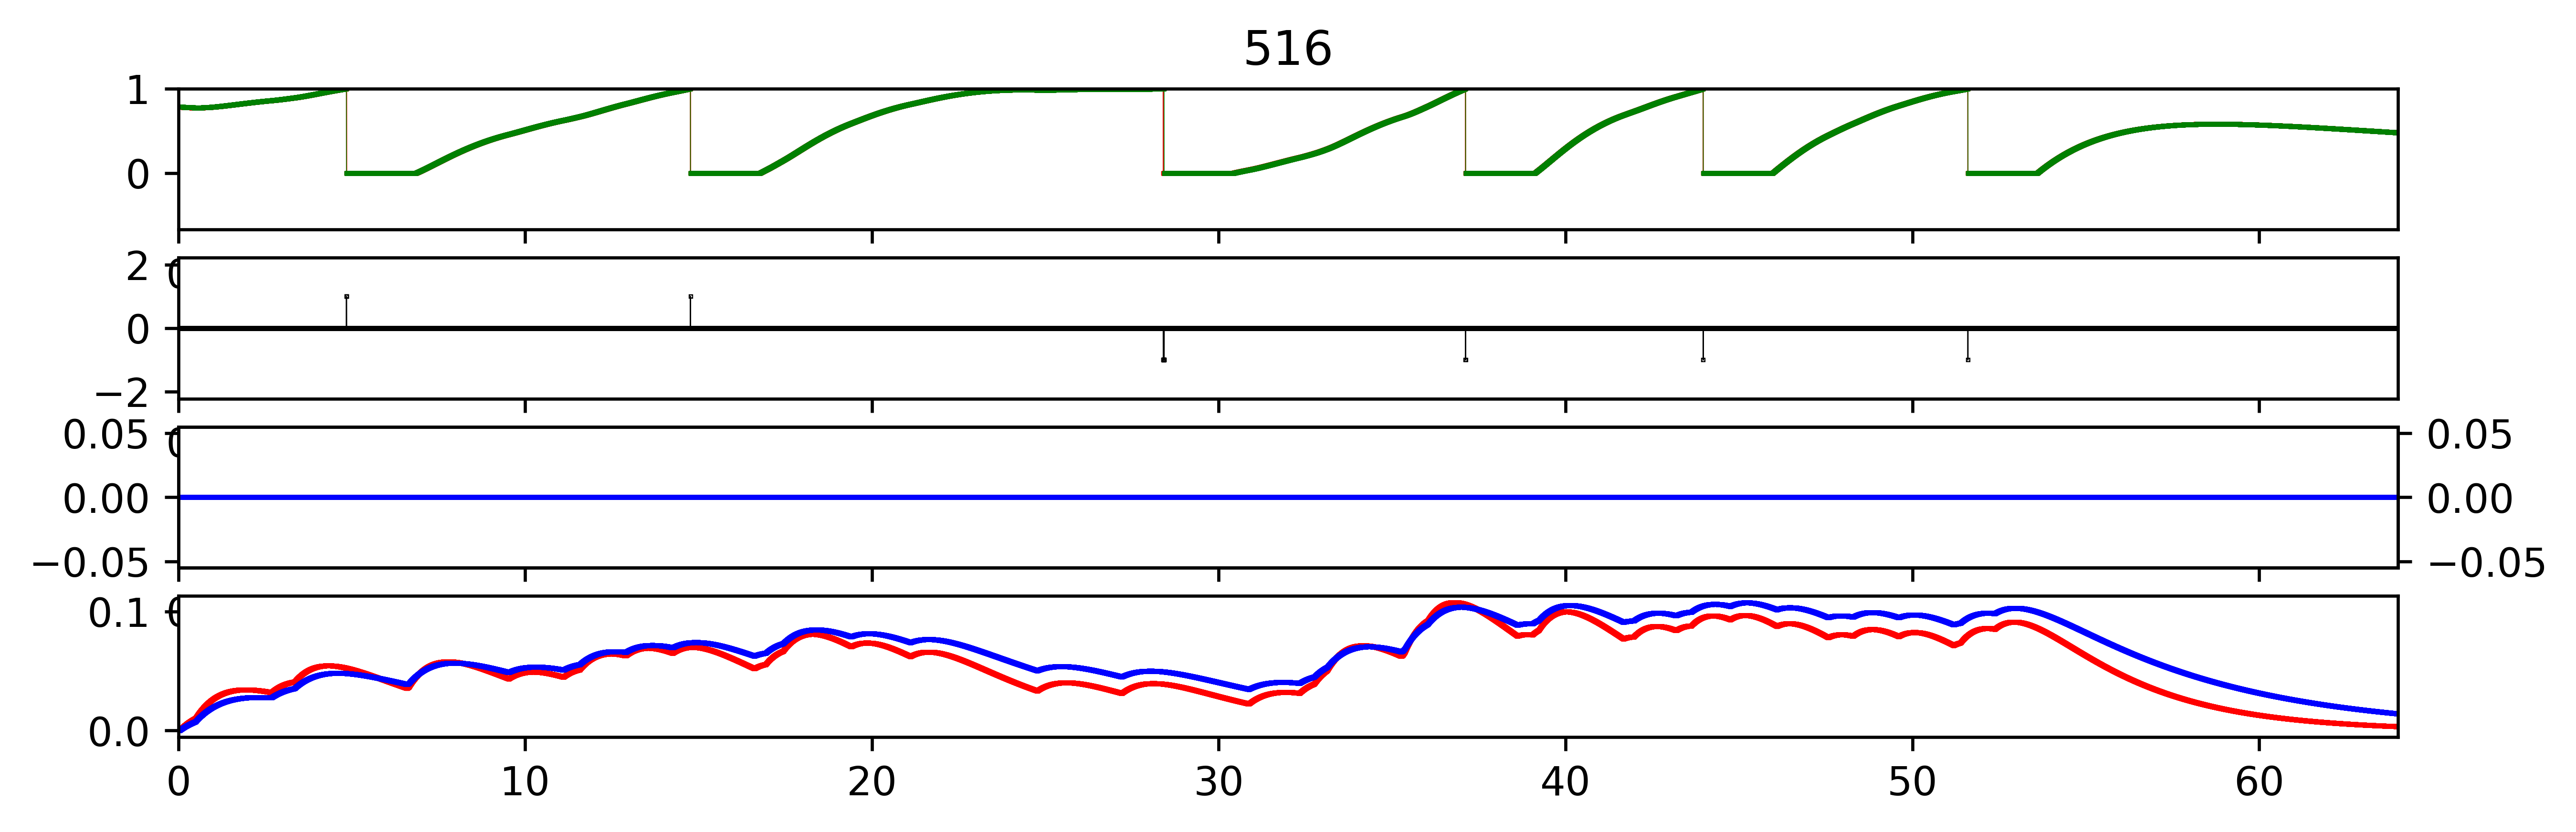

In [24]:
x1 = 0
x2 = 64
j = 9
t0 = b0.dt * np.arange(b0.nstep+1)
eps = np.finfo(float).eps*1e16
#eps = 3e-2
#geps = 1e-10
geps = np.finfo(float).eps*1e2
cross_pair_plot.fignum = 0
v_pair_plot.fignum = 1000
for i in [irand[50]]:
#for i in [749]:
    cross_pair_plot(b0, b[j], t[j], i, x1, x2, eps, geps)
    cross_pair_plot(w0, w[j], t[j], i, x1, x2, eps, geps)
    cross_pair_plot(s0, s[j], t[j], i, x1, x2, eps, geps)
    #v_pair_plot(w[j], b[j], t[j], i, x1, x2, eps, geps)
    v_pair_plot(b0, s0, t0, i, x1, x2, eps, geps)
    #v_pair_plot(s[j], w[j], t[j], i, x1, x2, eps, geps, 0, 1)
    #v_pair_plot(s[j], c[j], t[j], i, x1, x2, eps, geps, 0, 1)
    #v_pair_plot(b[j-1], w[j-1], t[j-1], i, x1, x2, eps, geps, 0, 1)
    #v_g_plot(r, t, r0, i, x1, x2)
    #v_g_plot(cr, t, cr0, i, x1, x2)
    #v_g_plot(p, t, p0, 0, 512, i)
    #v_g_plot(w, t, w0, 0, 512, i)

In [25]:
np.mean(acv[0,:1]), np.mean(crcv[0,:1])
np.mean(r[0].v), np.mean(cr[0].v)

NameError: name 'acv' is not defined

In [ ]:
np.sum(r[0].nSpikePerDt), np.sum(cr[0].nSpikePerDt)

In [ ]:
sum([x.size for x in r[0].raster]), sum([x.size for x in cr[0].raster])

In [ ]:
r[0].v.shape

In [ ]:
from result import *

In [ ]:
y1 = 0.99
y2 = 1.01
x1 = 89.4
x2 = 89.45
v_veff_plot.fignum = 0
#irand = np.random.randint(r0.nI, size = 10) + r0.nE
irand = np.arange(c0.nE, c0.n)
for i in range(604,605):
    print(i)
    v_veff_plot(cr,  t,  cr0, i, x1, x2, y1, y2)
    #v_veff_plot(cr, t, cr0, i, x1, x2, y1, y2)

In [ ]:
t0 = r0.dt*np.arange(r0.nstep+1)
fig = plt.figure('0', dpi = 600)
ax = fig.add_subplot(111)
irand = np.random.randint(r0.n, size = 1)
for i in irand:
    print(i)
    ax.plot(t0, c0.v[:,i], '-r', lw = 0.3)
    ax.plot(t0, cr0.v[:,i], '-g', lw = 0.2)
    ax.plot(t0, p0.v[:,i], '-b', lw = 0.1)

In [ ]:
65536*2

In [ ]:
512/131072